**Question**

Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


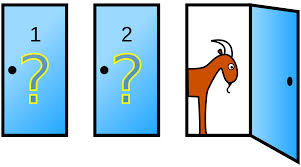

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#)

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


In [1]:
#your work here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nb_games = 1000

In [3]:
games = []
for i in range(nb_games):
    game = np.repeat('goat', 3)
    prize = np.random.randint(0,3,1) # the door behind which the car is hidden
    game[prize]='car' 
    games.append(game)

In [4]:
wins=0 # win counter
for i in range(nb_games):
    doors = [0,1,2]
    player_door_choice = int(np.random.choice(doors, 1)) # the player initial's door choice
    doors.remove(player_door_choice) # doors not chosen by player
    for j in doors: # Monty Hall reveals that behind one of the door not chosen is a goat
        if games[i][j] == 'goat':
            goat_door = j
    if games[i][player_door_choice] == 'car': # The player keeps his initial door choice
        wins += 1

In [5]:
print(f"Winning percentage: {round(wins/nb_games*100,1)}%")

Winning percentage: 33.1%


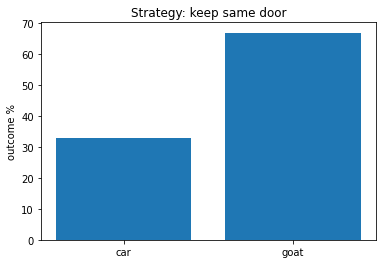

In [6]:
x_axis = ['car', 'goat']
y_axis = [int(wins/nb_games*100), 100 - int(wins/nb_games*100)]

plt.bar(x_axis, y_axis)
plt.title('Strategy: keep same door')
plt.ylabel('outcome %')
plt.show()

In [7]:
wins=0
for i in range(nb_games):
    doors = [0,1,2]
    player_door_choice = int(np.random.choice(doors, 1)) # the player initial's door choice
    doors.remove(player_door_choice) # doors not chosen
    for j in doors: # Monty Hall reveals that behind one of the door not chosen is a goat
        if games[i][j] == 'goat':
            goat_door = j
    doors.remove(goat_door) # the player changes its door choice
    if games[i][doors[0]] == 'car':
        wins += 1

In [8]:
print(f"Winning percentage: {round(wins/nb_games*100,1)}%")

Winning percentage: 66.7%


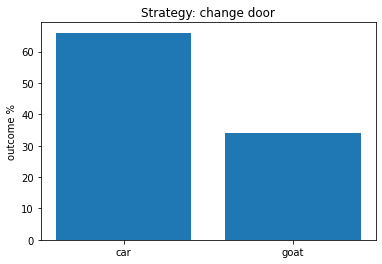

In [9]:
x_axis = ['car', 'goat']
y_axis = [int(wins/nb_games*100), 100 - int(wins/nb_games*100)]

plt.bar(x_axis, y_axis)
plt.title('Strategy: change door')
plt.ylabel('outcome %')
plt.show()

In [10]:
## the door changing strategy is much better with a 66.7% change of winning, vs 33.1% if we keep the original door.